# SAMPLE TREE SEQUENCE VISUALIZATION

## Load Original Tree Sequence

In [3]:
import msprime, pyslim
orig_ts = pyslim.load("/Users/ARIADNA/Desktop/test.trees")

## Recapitate

In [4]:
recap_ts = orig_ts.recapitate(recombination_rate = 1e-8, Ne=200, random_seed=5)

## Simplify

In [5]:
import numpy as np
np.random.seed(3)
alive_inds = recap_ts.individuals_alive_at(0)
keep_indivs = np.random.choice(alive_inds, 100, replace=False)
keep_nodes = [] #Makes empty list to append nodes of sampled individuals
for i in keep_indivs:
    keep_nodes.extend(recap_ts.individual(i).nodes)
simple_ts = recap_ts.simplify(keep_nodes) #Simplifying based on the nodes of the 100 individuals

In [7]:
(recap_ts.individual(i))

Individual(id=24, flags=65536, location=array([0.32705065, 0.61793526, 0.        ]), parents=array([], dtype=int32), nodes=array([48, 49], dtype=int32), metadata={'pedigree_id': 199924, 'age': -1, 'subpopulation': 1, 'sex': -1, 'flags': 0})

## Mutate

In [7]:
mutated_ts = msprime.mutate(simple_ts, rate=1e-7, random_seed=1, keep=True)
mutated_ts.dump("/Users/ARIADNA/Desktop/test_mut.trees")

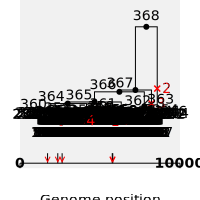

In [9]:
from IPython.display import SVG
SVG(mutated_ts.draw_svg())